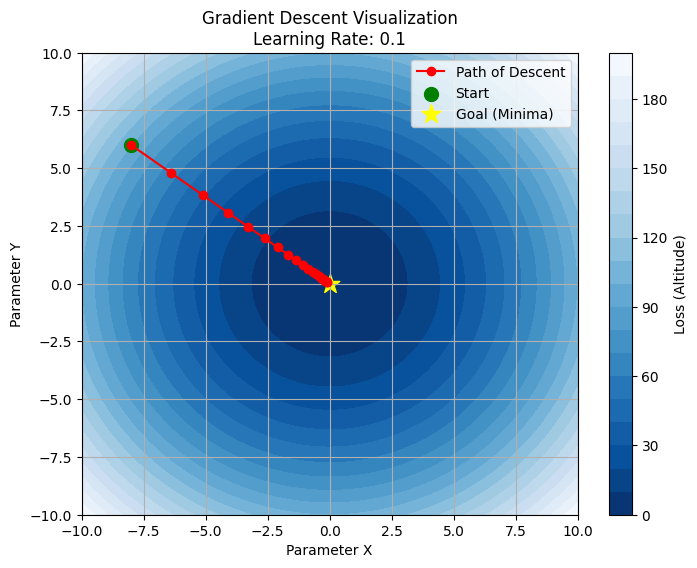

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 損失関数（山の地形）: f(x, y) = x^2 + y^2
# 目標は (0, 0) にたどり着くこと
def loss_function(x, y):
    return x**2 + y**2

# 2. 勾配の計算（足元の傾斜）
# f(x, y) を x と y でそれぞれ偏微分します
def calculate_gradient(x, y):
    grad_x = 2 * x  # x^2 の微分
    grad_y = 2 * y  # y^2 の微分
    return grad_x, grad_y

# 3. 勾配降下法の実装
def gradient_descent(start_x, start_y, learning_rate, iterations):
    # 履歴を保存するリスト（可視化用）
    path_x = [start_x]
    path_y = [start_y]

    x = start_x
    y = start_y

    for i in range(iterations):
        # 今の場所の傾きを計算
        grad_x, grad_y = calculate_gradient(x, y)

        # 傾きと逆方向へ「学習率」分だけ進む
        # x_new = x - (学習率 * 傾き)
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y

        path_x.append(x)
        path_y.append(y)

    return path_x, path_y

# --- 設定 ---
start_x, start_y = -8.0, 6.0  # スタート地点（山の上）
learning_rate = 0.1           # 歩幅（学習率）
iterations = 20               # 何歩進むか

# --- 実行 ---
path_x, path_y = gradient_descent(start_x, start_y, learning_rate, iterations)

# --- 可視化（等高線グラフ） ---
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = loss_function(X, Y)

plt.figure(figsize=(8, 6))

# 山の等高線を描く（青い色が濃いほど低い場所）
plt.contourf(X, Y, Z, levels=20, cmap='Blues_r')
plt.colorbar(label='Loss (Altitude)')

# 移動した経路を赤い点と線で描く
plt.plot(path_x, path_y, 'ro-', label='Path of Descent')
plt.scatter(path_x[0], path_y[0], color='green', s=100, label='Start') # スタート
plt.scatter(0, 0, color='yellow', marker='*', s=200, label='Goal (Minima)') # ゴール

plt.title(f'Gradient Descent Visualization\nLearning Rate: {learning_rate}')
plt.xlabel('Parameter X')
plt.ylabel('Parameter Y')
plt.legend()
plt.grid(True)
plt.show()




In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation # ★ 追加

# 1. 損失関数（山の地形）: f(x, y) = x^2 + y^2
def loss_function(x, y):
    return x**2 + y**2

# 2. 勾配の計算（足元の傾斜）
def calculate_gradient(x, y):
    grad_x = 2 * x
    grad_y = 2 * y
    return grad_x, grad_y

# 3. 勾配降下法の実装 (変更なし)
def gradient_descent(start_x, start_y, learning_rate, iterations):
    path_x = [start_x]
    path_y = [start_y]

    x = start_x
    y = start_y

    for i in range(iterations):
        grad_x, grad_y = calculate_gradient(x, y)

        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y

        path_x.append(x)
        path_y.append(y)

    return path_x, path_y

# --- 設定 ---
start_x, start_y = -8.0, 6.0
learning_rate = 0.1
iterations = 50 # アニメーションのためステップ数を増やしました

# --- 実行 ---
path_x, path_y = gradient_descent(start_x, start_y, learning_rate, iterations)

# --- 可視化（アニメーション） ---

# グラフの準備
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = loss_function(X, Y)

fig, ax = plt.subplots(figsize=(8, 6))

# 山の等高線を描く (背景)
ax.contourf(X, Y, Z, levels=30, cmap='viridis')
fig.colorbar(ax.contourf(X, Y, Z, levels=30, cmap='viridis'), label='Loss (Altitude)')

# ゴール地点
ax.scatter(0, 0, color='red', marker='*', s=200, label='Goal (Minima)', zorder=5)

ax.set_title(f'Gradient Descent Animation (LR: {learning_rate})')
ax.set_xlabel('Parameter X')
ax.set_ylabel('Parameter Y')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.grid(True, alpha=0.5)

# 移動経路と現在の点を描画するためのプレースホルダー
line, = ax.plot([], [], 'r-', linewidth=2, label='Path') # 経路線
point, = ax.plot([], [], 'ro', markersize=8, label='Current Position', zorder=10) # 現在の点
ax.legend()

# --- アニメーション関数 ---
def animate(i):
    # i: 現在のフレーム番号

    # 経路の更新（0から現在のステップまで）
    line.set_data(path_x[:i+1], path_y[:i+1])

    # 現在の点の更新：単一の値をリスト（シーケンス）として渡す
    # [path_x[i]] と [path_y[i]] のようにブラケットで囲みます
    point.set_data([path_x[i]], [path_y[i]])

    # タイトルの更新
    ax.set_title(f'Gradient Descent Animation (Step: {i}/{iterations}, Loss: {loss_function(path_x[i], path_y[i]):.2f})')

    return line, point,

# アニメーションの作成
# frames: ステップ数
# interval: 各フレーム間のミリ秒（100ms = 0.1秒）
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=len(path_x),
    interval=100,
    blit=True,
    repeat=False
)

# --- 動画の保存または表示 ---

# Google ColabやJupyter Notebookで表示する場合（通常はこちらでOK）
# %matplotlib inline は不要です。
plt.close() # 重複表示を防ぐ
from IPython.display import HTML
HTML(ani.to_jshtml())




In [4]:
# ローカルPCで動画ファイルとして保存する場合
# ffmpeg がインストールされている必要があります。
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save('gradient_descent_animation.mp4', writer=writer)
plt.show()